In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

/Users/mega/anaconda3/envs/ml/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 219s 4ms/step - loss: 0.2621 - acc: 0.9201 - val_loss: 0.0612 - val_acc: 0.9797
Epoch 2/12
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0891 - acc: 0.9739 - val_loss: 0.0407 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0661 - acc: 0.9807 - val_loss: 0.0348 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0542 - acc: 0.9840 - val_loss: 0.0304 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 227s 4ms/step - loss: 0.0462 - acc: 0.9853 - val_loss: 0.0289 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0420 - acc: 0.9869 - val_loss: 0.0303 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 217s 4ms/step - loss: 0.0381 - acc: 0.9885 - val_loss: 0.0293 - 

In [3]:
from keras.models import load_model

model.save('mnist_keras_cnn_model.hdf5')
model.save_weights('mnist_keras_cnn_weight.hdf5')

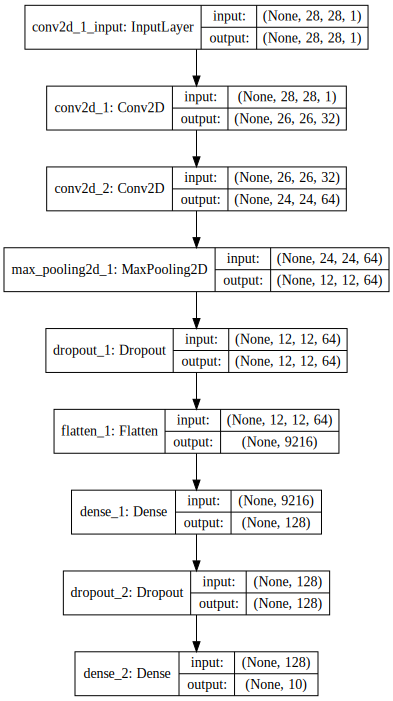

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

#SVG(model_to_dot(model).create(prog='dot', format='svg'))
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))